# Decision Trees

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Decision Tree Regression

In [53]:
df = pd.read_csv('../data/Lab4/study_score.csv')
df

,StudyHours,SleepHours,CoffeeCups,Score
0,1,9,0,3
1,2,8,1,5
2,3,7,1,8
3,4,7,2,12
4,5,6,2,15
5,6,6,3,14
6,7,5,3,10
7,8,5,4,7
8,9,4,4,4
9,10,4,5,2


In [54]:
feature = "CoffeeCups"
target = "Score"
df1 = df[[feature, target]].copy()
df1

,CoffeeCups,Score
0,0,3
1,1,5
2,1,8
3,2,12
4,2,15
5,3,14
6,3,10
7,4,7
8,4,4
9,5,2


In [55]:
df1.sort_values(by=feature, inplace=True)
df1

,CoffeeCups,Score
0,0,3
1,1,5
2,1,8
3,2,12
4,2,15
5,3,14
6,3,10
7,4,7
8,4,4
9,5,2


Text(0, 0.5, 'Score')

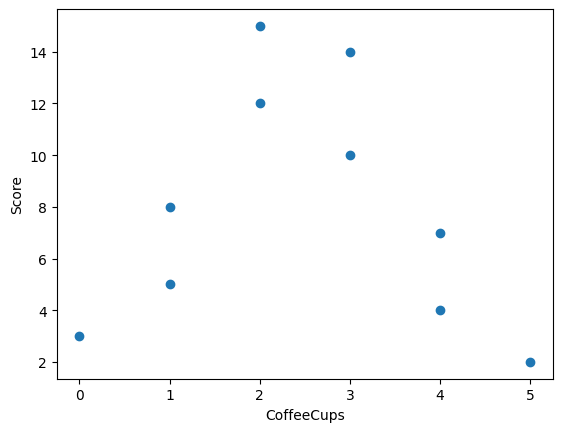

In [56]:
plt.scatter(df1[feature], df1[target])
plt.xlabel(feature)
plt.ylabel(target)

In [57]:
# Calculate the candidate thresholds
# thresholds = (df1[feature][:-1].values + df1[feature][1:].values) / 2
# df1['Threshold'] = [np.nan] + thresholds.tolist()
# df1

# Compute unique sorted feature values
unique_vals = np.unique(df[feature])
thresholds = (unique_vals[:-1] + unique_vals[1:]) / 2
thresholds

array([0.5, 1.5, 2.5, 3.5, 4.5])

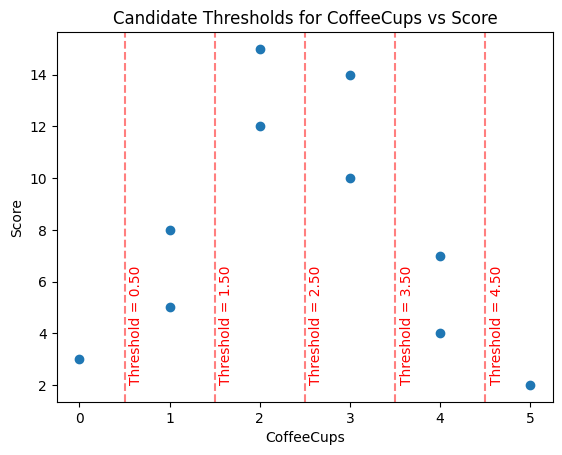

In [58]:
# Plotting the thresholds on the scatter plot
plt.scatter(df1[feature], df1[target])
for thresh in thresholds:
    plt.axvline(x=thresh, color='red', linestyle='--', alpha=0.5)
    plt.text(
        thresh + 0.05,
        df1[target].min(),
        f'Threshold = {thresh:.2f}',
        rotation=90,
        verticalalignment='bottom',
        color='red'
    )
plt.xlabel(feature)
plt.ylabel(target)
plt.title(f'Candidate Thresholds for {feature} vs {target}')
plt.show()

In [60]:
# Compute mean target values for left and right splits
mean_left = []
mean_right = []

for thresh in thresholds:
    left_split = df1[df1[feature] <= thresh][target]
    right_split = df1[df1[feature] > thresh][target]
    print(f"Threshold= {thresh}, left {left_split.to_list()}, right {right_split.to_list()}")
    mean_left.append(left_split.mean())
    mean_right.append(right_split.mean())
    print(f"Mean Left: {left_split.mean()}, Mean Right: {right_split.mean()}")

threshold_df = pd.DataFrame({
    "thresholds": thresholds,
    "mean_left": mean_left,
    "mean_right": mean_right,
})
threshold_df

Threshold= 0.5, left [3], right [5, 8, 12, 15, 14, 10, 7, 4, 2]
Mean Left: 3.0, Mean Right: 8.555555555555555
Threshold= 1.5, left [3, 5, 8], right [12, 15, 14, 10, 7, 4, 2]
Mean Left: 5.333333333333333, Mean Right: 9.142857142857142
Threshold= 2.5, left [3, 5, 8, 12, 15], right [14, 10, 7, 4, 2]
Mean Left: 8.6, Mean Right: 7.4
Threshold= 3.5, left [3, 5, 8, 12, 15, 14, 10], right [7, 4, 2]
Mean Left: 9.571428571428571, Mean Right: 4.333333333333333
Threshold= 4.5, left [3, 5, 8, 12, 15, 14, 10, 7, 4], right [2]
Mean Left: 8.666666666666666, Mean Right: 2.0


,thresholds,mean_left,mean_right
0,0.5,3.000000,8.555556
1,1.5,5.333333,9.142857
2,2.5,8.600000,7.400000
3,3.5,9.571429,4.333333
4,4.5,8.666667,2.000000


In [73]:
# Compute mean square errors
N = df1.shape[0]
var_thresholds = []

for i, row in threshold_df.iterrows():
    threshold = row.thresholds
    ml = row.mean_left
    mr = row.mean_right

    left_arr = df1[df1[feature] <= threshold][target].values
    right_arr = df1[df1[feature] > threshold][target].values

    var_left = ((left_arr - ml) ** 2).mean() if len(left) > 0 else 0
    var_right = ((right_arr - mr) ** 2).mean() if len(right) > 0 else 0

    N_left = left.shape[0]
    N_right = right.shape[0]

    var_threshold = var_left * (N_left/N) + var_right * (N_right/N)
    var_thresholds.append(var_threshold)

    print(f"Threshold={threshold}, var={var_threshold}")


Threshold=0.5, var=1.8246913580246915
Threshold=1.5, var=5.926530612244898
Threshold=2.5, var=19.320000000000004
Threshold=3.5, var=16.071201814058956
Threshold=4.5, var=15.200000000000001


In [77]:
# Selected threshold has the least error
min_var_idx = np.argmin(var_thresholds)
best_threshold = thresholds[min_var_idx]
best_var = var_thresholds[min_var_idx]

print(f"Best threshold for {feature} is {best_threshold} with MSE = {best_var}")

Best threshold for CoffeeCups is 0.5 with MSE = 1.8246913580246915


In [80]:
# Make prediction based on the best threshold for StudyHours = 2.5
new_feature = 12
if new_feature <= best_threshold:
    prediction = threshold_df.loc[min_var_idx, 'mean_left']
else:
    prediction = threshold_df.loc[min_var_idx, 'mean_right']

print(f"Predicted {target} for {feature}={new_feature} is {prediction}")

Predicted Score for CoffeeCups=12 is 8.555555555555555


In [87]:
def find_best_threshold_for_one_feature(df, feature, target):
    df1 = df[[feature, target]].copy()
    df1.sort_values(by=feature, inplace=True)

    x = df1[feature].values
    y = df1[target].values
    N = len(df1)

    # Compute unique sorted feature values
    unique_vals = np.unique(x)
    if unique_vals.size < 2:
        return None, np.inf
    thresholds = (unique_vals[:-1] + unique_vals[1:]) / 2

    best_threshold = None
    best_mse = np.inf

    # Compute MSE for each threshold
    for thresh in thresholds:
        left_mask = x <= thresh
        right_mask = ~left_mask

        y_left = y[left_mask]
        y_right = y[right_mask]

        # Skip degenerate splits
        if len(y_left) == 0 or len(y_right) == 0:
            continue

        ml = y_left.mean()
        mr = y_right.mean()

        # Variances (MSE impurity inside each side)
        var_left = ((y_left - ml) ** 2).mean()
        var_right = ((y_right - mr) ** 2).mean()

        N_left = len(y_left)
        N_right = len(y_right)

        # Weighted variance after split
        weighted_var = var_left * (N_left / N) + var_right * (N_right / N)

        if weighted_var < best_mse:
            best_mse = weighted_var
            best_threshold = thresh

    return best_threshold, best_mse

In [ ]:
checking_feature = "SleepHours"
best_threshold, best_mse = find_best_threshold_for_one_feature(
    df=df,
    feature=checking_feature,
    target=target
)
print(f"Best threshold for feature {checking_feature} is {best_threshold}, Best MSE: {best_mse}")

Best threshold for feature SleepHours: 4.5, Best MSE: 12.95


In [94]:
# Select the root feature with the lowest MSE among candidates
candidate_features = ["CoffeeCups", "SleepHours", "StudyHours"]

def find_best_feature(df, candidate_features, target):
    best_feature = None
    best_threshold = None
    best_mse = np.inf

    for feature in candidate_features:
        threshold, mse = find_best_threshold_for_one_feature(df, feature, target)

    if mse < best_mse:
        best_mse = mse
        best_threshold = threshold
        best_feature = feature
        
    return best_feature, best_threshold, best_mse

best_feature, best_threshold, best_mse = find_best_feature(df, candidate_features, target)
print(f"Selected Root Feature: {best_feature}, Threshold: {best_threshold}, MSE: {best_mse}")

Selected Root Feature: StudyHours, Threshold: 8.5, MSE: 12.95


In [ ]:
MIN_SPLIT_SAMPLES = 3
left_df = df[df[best_feature] <= best_threshold]
right_df = df[df[best_feature] > best_threshold]
left_df, right_df

(   StudyHours  SleepHours  CoffeeCups  Score
 8           9           4           4      4
 9          10           4           5      2,
    StudyHours  SleepHours  CoffeeCups  Score
 0           1           9           0      3
 1           2           8           1      5
 2           3           7           1      8
 3           4           7           2     12
 4           5           6           2     15
 5           6           6           3     14
 6           7           5           3     10
 7           8           5           4      7)

In [96]:
best_feature2, best_threshold2, best_mse2 = find_best_feature(df, candidate_features, target)
best_feature2, best_threshold2

('StudyHours', np.float64(8.5))

In [ ]:
def build_tree(df, candidate_features, target, min_samples=5, depth=0, max_depth=3):
    # Stopping criteria
    if len(df) < min_samples or depth >= max_depth:
        return {
            "type": "leaf",
            "prediction": df[target].mean()
        }

    # Find the best feature and threshold to split on
    best_feature, best_threshold, best_mse = find_best_feature(df, candidate_features, target)

    if best_feature is None:
        return {
            "type": "leaf",
            "prediction": df[target].mean()
        }

    # Split the dataset
    left_df = df[df[best_feature] <= best_threshold]
    right_df = df[df[best_feature] > best_threshold]

    # Recursively build the left and right subtrees
    left_subtree = build_tree(
        df=left_df,
        candidate_features=candidate_features,
        target=target,
        min_samples=min_samples,
        depth=depth + 1,
        max_depth=max_depth
    )
    right_subtree = build_tree(
        df=right_df,
        candidate_features=candidate_features,
        target=target,
        min_samples=min_samples,
        depth=depth + 1,
        max_depth=max_depth
    )

    return {
        "type": "node",
        "feature": best_feature,
        "threshold": best_threshold,
        "left": left_subtree,
        "right": right_subtree
    }

In [99]:
tree = build_tree(df, candidate_features, target)
tree

{'type': 'node',
 'feature': 'StudyHours',
 'threshold': np.float64(8.5),
 'left': {'type': 'node',
  'feature': 'StudyHours',
  'threshold': np.float64(3.5),
  'left': {'type': 'leaf', 'prediction': np.float64(5.333333333333333)},
  'right': {'type': 'node',
   'feature': 'StudyHours',
   'threshold': np.float64(6.5),
   'left': {'type': 'leaf', 'prediction': np.float64(13.666666666666666)},
   'right': {'type': 'leaf', 'prediction': np.float64(8.5)}}},
 'right': {'type': 'leaf', 'prediction': np.float64(3.0)}}

In [100]:
def predict(tree, sample):
    if tree["type"] == "leaf":
        return tree["prediction"]

    feature = tree["feature"]
    threshold = tree["threshold"]

    if sample[feature] <= threshold:
        return predict(tree["left"], sample)
    else:
        return predict(tree["right"], sample)

In [101]:
prediction = predict(tree, {"CoffeeCups": 3, "SleepHours": 6, "StudyHours": 10})
prediction

np.float64(3.0)

## 2. Decision Classification

## 3. Exercise